In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [2]:
# データの前処理を定義
transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.Resize((30,30)),
    transforms.ToTensor(),
])

In [3]:
# データセットをロード
train_data = datasets.ImageFolder("データセットのパス（leave-one-outを利用していた）", transform=transform)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)

In [4]:
# CNNモデルを定義
"""
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 2)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(F.max_pool2d(x, 2))
        x = self.conv2(x)
        x = F.relu(F.max_pool2d(x, 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64*15*15, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 2)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = x.view(-1, 64*15*15)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)
"""

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64*30*30, 128)
        self.fc2 = nn.Linear(128, 2)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = x.view(-1, 64*30*30)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)


In [5]:
# モデルとオプティマイザを定義
model = Net()
#optimizer = optim.Adam(model.parameters(), lr=0.001)
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.5)

In [6]:
# 学習と評価
def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        """
        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            """
        
def test():
    model.eval()
    test_loss = 0
    correct = 0
  
    with torch.no_grad():
        for data, target in train_loader:
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(train_loader.dataset)
    accuracy = 100. * correct / len(train_loader.dataset)
    print('Test set {}: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)'.format(epoch, 
        test_loss, correct, len(train_loader.dataset), accuracy))
  
        
    return accuracy        

In [7]:
# 各エポックでの正解率を保存するためのリスト
accuracy_list = []

for epoch in range(1, 30+1):
    train(epoch)
    accuracy = test()
    accuracy_list.append(accuracy)

acc_list = [round(accuracy_list[n], 1) for n in range(len(accuracy_list))]
print("\n")
print(acc_list)

Test set 1: Average loss: 0.6936, Accuracy: 450/900 (50%)
Test set 2: Average loss: 0.6934, Accuracy: 450/900 (50%)
Test set 3: Average loss: 0.6933, Accuracy: 450/900 (50%)
Test set 4: Average loss: 0.6933, Accuracy: 450/900 (50%)
Test set 5: Average loss: 0.6933, Accuracy: 450/900 (50%)
Test set 6: Average loss: 0.6932, Accuracy: 450/900 (50%)
Test set 7: Average loss: 0.6931, Accuracy: 450/900 (50%)
Test set 8: Average loss: 0.6931, Accuracy: 450/900 (50%)
Test set 9: Average loss: 0.6931, Accuracy: 450/900 (50%)
Test set 10: Average loss: 0.6931, Accuracy: 450/900 (50%)
Test set 11: Average loss: 0.6931, Accuracy: 450/900 (50%)
Test set 12: Average loss: 0.6931, Accuracy: 450/900 (50%)
Test set 13: Average loss: 0.6931, Accuracy: 450/900 (50%)
Test set 14: Average loss: 0.6931, Accuracy: 450/900 (50%)
Test set 15: Average loss: 0.6931, Accuracy: 483/900 (54%)
Test set 16: Average loss: 0.6931, Accuracy: 450/900 (50%)
Test set 17: Average loss: 0.6931, Accuracy: 447/900 (50%)
Test s

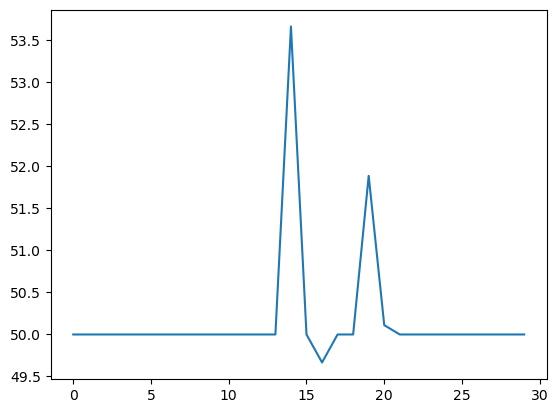

In [8]:
# 過学習を確認するために正解率のグラフを表示
plt.plot(accuracy_list)
plt.show()

In [9]:
# モデルを保存
torch.save(model.state_dict(), "モデル保存のパス．model.pth")

In [10]:
def test(test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    accuracy = 100. * correct / len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset), accuracy))
    
    return accuracy




# モデルのロード

model_path = "モデルのパスmodel.pth"
model.load_state_dict(torch.load(model_path))
model.eval()

# 新たな人物のデータセットをロード
new_person_data = datasets.ImageFolder("leave-ont-outのテストデータのパス", transform=transform)
new_person_loader = DataLoader(new_person_data, batch_size=8, shuffle=False)

# テスト関数の呼び出し
test_accuracy = test(new_person_loader)


Test set: Average loss: 0.6930, Accuracy: 90/180 (50%)

